In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import urllib.request
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
import pandas as pd

%matplotlib inline

In [3]:
index = ["color", "color_name", "hex", "R", "G", "B"]
csv = pd.read_csv('colors.csv', names=index, header=None)

In [4]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [5]:
def get_color_name(R, G, B):
    minimum = 10000
    for i in range(len(csv)):
        d = abs(R - int(csv.loc[i, "R"])) + abs(G - int(csv.loc[i, "G"])) + abs(B - int(csv.loc[i, "B"]))
        if d <= minimum:
            minimum = d
            cname = csv.loc[i, "color_name"]
    return cname

In [6]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    # here we count how many elements are present in each cluster and each cluster is represented by a number
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    color_names = list(map(lambda color: get_color_name(int(color[0]), int(color[1]), int(color[2])), rgb_colors))

    if (show_chart):
      fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
      ax1.pie(counts.values(), labels=color_names, colors=hex_colors, autopct='%1.1f%%')
      ax2.imshow(image)
      ax2.axis('off')
      plt.subplots_adjust(wspace=0.4)
      plt.show()
        
    

## color identification on an image from local folder

In [7]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


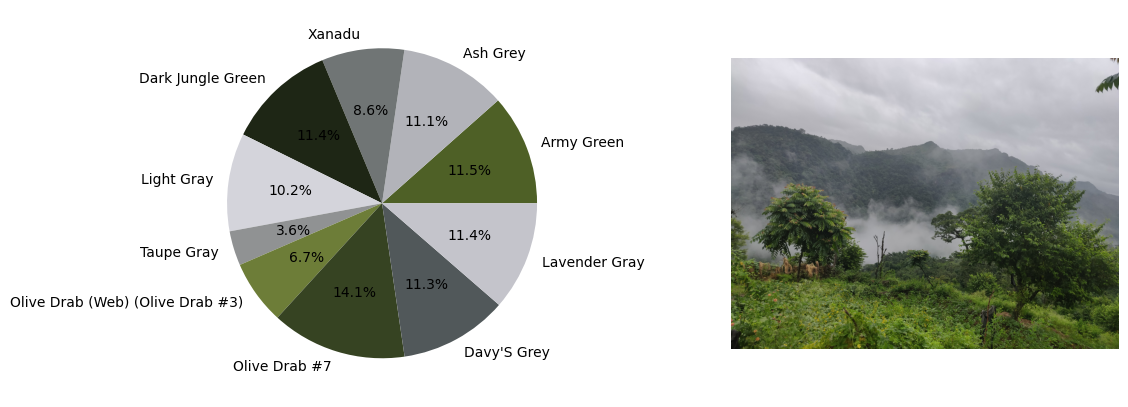

In [23]:
get_colors(get_image('sample_image.jpg'), 10, True)

## color identification on an image obtained from its url

In [9]:
def get_image_fromUrl(image_url):
  image_data = urllib.request.urlopen(image_url).read()
  image_np = np.frombuffer(image_data, np.uint8)
  image = cv2.imdecode(image_np, cv2.IMREAD_COLOR)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  return image

In [10]:
image_url = 'https://www.seiu1000.org/sites/main/files/main-images/camera_lense_0.jpeg'

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


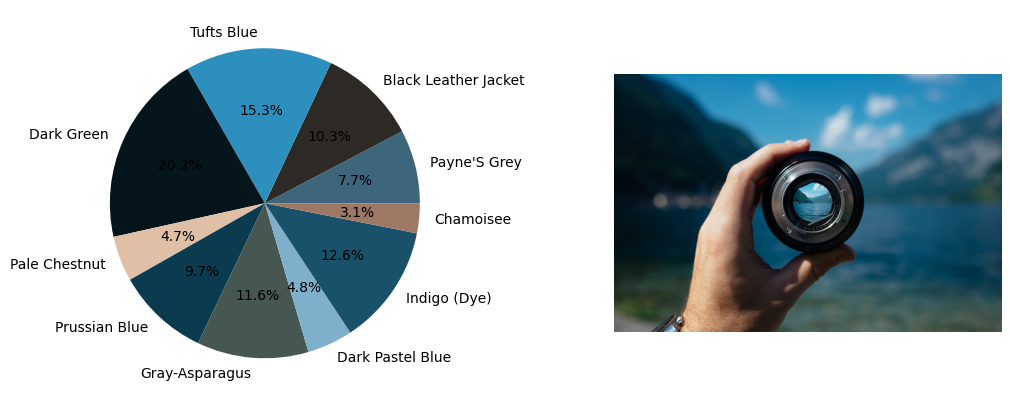

In [24]:
get_colors(get_image_fromUrl(image_url), 10, True)